In [6]:
# 모델 - GPT 3.5 Turbo 선택
model = "gpt-3.5-turbo"

# 질문 작성하기
query = "텍스트를 입력받아 이미지를 생성하는 방법을 알려주세요."

# 메시지 설정하기
messages = [
        {"role": "system", "content": "You are a helpful assistant."},
        {"role": "user", "content": query}
]

# ChatGPT API 호출하기
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)
answer = response['choices'][0]['message']['content']
answer

'텍스트를 입력받아 이미지를 생성하는 방법에는 여러가지 방법이 있습니다. 그 중에서 몇 가지 방법을 알려드리겠습니다.\n\n1. Pillow 라이브러리를 활용하는 방법\n- Python에서 이미지를 다루는데 가장 많이 사용되는 Python Imaging Library(PIL)에서 파생된 파이썬 이미징 라이브러리입니다.\n- 아래는 Pillow 라이브러리를 활용하여 텍스트를 입력받아 이미지를 생성하는 예시입니다.\n\n```python\nfrom PIL import Image, ImageDraw, ImageFont\n\n# 이미지 생성\nimage = Image.new(\'RGB\', (500, 300), color = (73, 109, 137))\n\n# 글쓰기 준비\ndraw = ImageDraw.Draw(image)\ntext = "Hello, World!"\nfont = ImageFont.truetype(\'arial.ttf\', 36)\n\n# 글씨 쓰기\ntextwidth, textheight = draw.textsize(text, font)\nx = (image.width - textwidth) / 2\ny = (image.height - textheight) / 2\ndraw.text((x, y), text, font=font)\n\n# 이미지 저장\nimage.save(\'helloatom.jpg\')\n```\n\n2. Pygame 라이브러리를 활용하는 방법\n- Python에서 게임 개발에 많이 사용되는 라이브러리입니다.\n- 아래는 Pygame 라이브러리를 활용하여 텍스트를 입력받아 이미지를 생성하는 예시입니다.\n\n```python\nimport pygame\n\n# pygame 초기화\npygame.init()\n\n# 화면 설정\nwidth, height = 500, 300\nscreen = pygame.display.set_mode((width, height))\n\n# 글씨 쓰기 \nfont = pygame.font.SysFont

In [7]:
pip install Pykakao

Note: you may need to restart the kernel to use updated packages.


In [9]:
from config import Config
from PyKakao import Karlo

# 발급받은 API 키 설정
KAKAO_API_KEY = Config.KAKAO_KEY

# Karlo API 인스턴스 생성
karlo = Karlo(service_key = KAKAO_API_KEY)

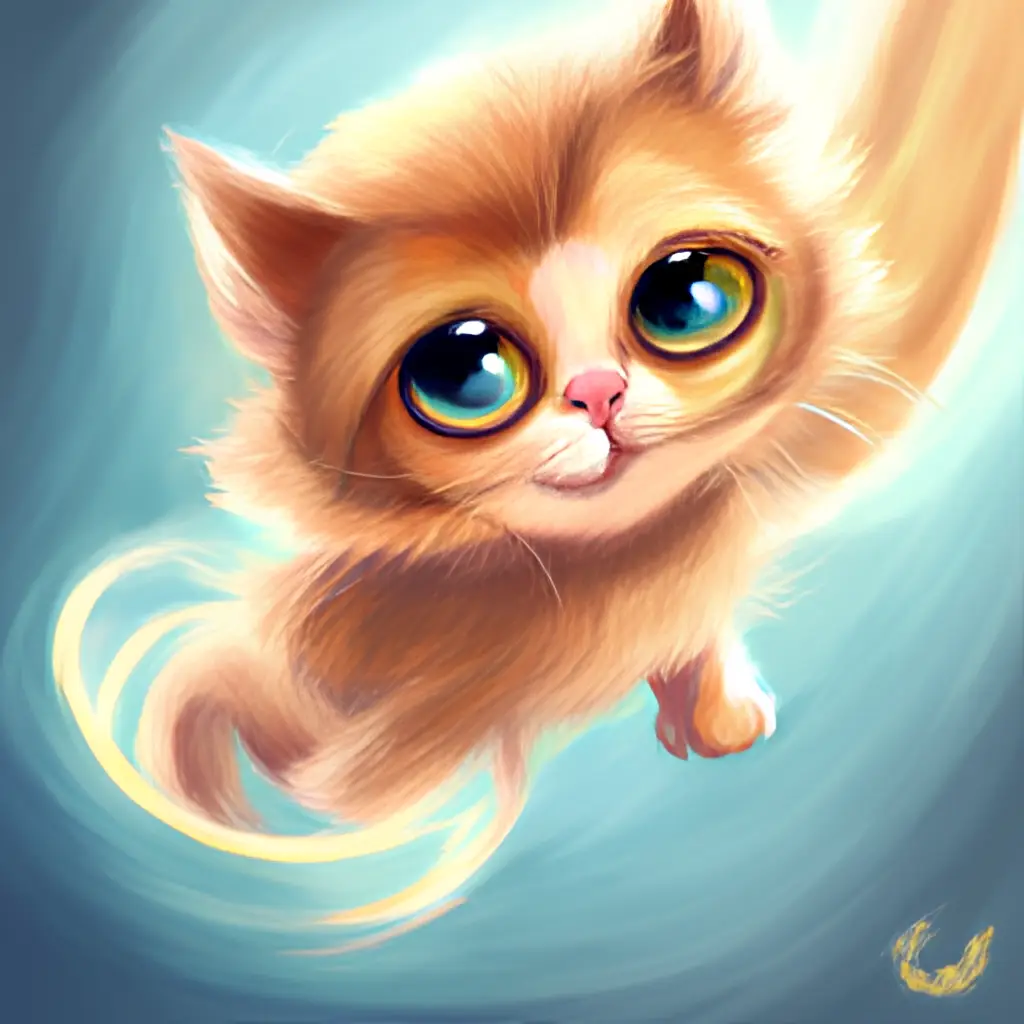

In [10]:
# 프롬프트에 사용할 제시어
text = "귀여운 마법의 날아다니는 고양이, 부드러운 황금빛 털, 픽사 컨셉 아티스트가 그린 판타지 아트, 토이 스토리 주인공, 맑고 밝은 눈, 날카로운 코"

# 이미지 생성하기 REST API 호출
img_dict = karlo.text_to_image(text, 1)

# 생성된 이미지 정보
img_str = img_dict.get("images")[0].get('image')

# base64 string을 이미지로 변환
img = karlo.string_to_image(base64_string = img_str, mode = 'RGBA')
img

In [11]:
img.save('cat.png')

In [ ]:
import json
import openai
import boto3

def lambda_handler(event, context):
    
    model_to_use = "text-davinci-003"
    input_prompt="Write an email to Elon Musk asking him why he bought Twitter for such a huge amount"
    
    openai.api_key = get_api_key()
    response = openai.Completion.create(
      model=model_to_use,
      prompt=input_prompt,
      temperature=0,
      max_tokens=100,
      top_p=1,
      frequency_penalty=0.0,
      presence_penalty=0.0
    )
    #print(response)
    text_response = response['choices'][0]['text'].strip()
    return {
        'statusCode':200,
        'body': {
            'response' : text_response
        }
    }
    
def get_api_key():
    lambda_client = boto3.client('lambda')
    response = lambda_client.invoke(
            FunctionName = 'arn:aws:lambda:us-east-1:000000000000:function:openai_get_api_key',
            InvocationType = 'RequestResponse'
        )

    openai_api_key = json.load(response['Payload'])['body']['api_key']
    return openai_api_key


In [10]:
import tensorflow as tf
from transformers import TFGPT2LMHeadModel, GPT2Tokenizer
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import os
import re
import json
import random
import requests
import time
import datetime
import sys
import argparse
import logging
import logging.handlers
import traceback
import subprocess
import shutil
import glob
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk import FreqDist
from nltk import ngrams
from nltk import bigrams
from nltk import trigrams
from nltk import everygrams
from nltk import ConditionalFreqDist
from nltk import ConditionalProbDist
from nltk import MLEProbDist
from nltk import NaiveBayesClassifier
from nltk import classify
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk import pos_tag
from nltk import ne_chunk
from nltk import RegexpParser
from nltk import Tree
from nltk import ChunkParserI
from nltk import conlltags2tree
from nltk import tree2conlltags
from nltk import ChunkScore
from nltk import word_tokenize
from nltk import pos_tag
from nltk import ne_chunk
from nltk import RegexpParser
from nltk import Tree


# 모델을 가져온다
model = TFGPT2LMHeadModel.from_pretrained('gpt2')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# 학습 데이터 및 레이블 정의
train_text = ["I love you", "I hate you", "I like you", "I don't like you", "I don't love you", "I don't hate you"] # 학습 데이터
train_labels = ["love", "hate", "like", "dislike", "dislike", "dislike"] # 학습 레이블

# 입력 데이터 및 레이블 토큰화 # 토큰화란 텍스트를 토큰 단위로 분리하는 것을 의미 # 토큰은 단어, 문장부호, 숫자 등이 될 수 있음 # 토큰화를 하는 이유는 텍스트를 토큰 단위로 분리하면 텍스트를 숫자로 변환할 수 있기 때문 # 숫자는 기계가 처리하기 쉬우므로 텍스트를 숫자로 변환하면 기계가 텍스트를 처리할 수 있음 # 토큰화를 하면 텍스트를 숫자로 변환할 수 있고, 숫자로 변환하면 기계가 텍스트를 처리할 수 있음 # 토큰화를 하면 텍스트를 숫자로 변환할 수 있고, 숫자로 변환하면 기계가 텍스트를 처리할 수 있음
input_ids = [tokenizer.encode(train_text[i], add_special_tokens=True) for i in range(len(train_text))] # 입력 데이터 토큰화
labels_ids = [tokenizer.encode(train_labels[i], add_special_tokens=True) for i in range(len(train_labels))] # 레이블 토큰화
print("토큰화: ", input_ids)
print("토큰화: ", labels_ids)

# 입력 데이터 및 레이블 패딩
max_len = max([len(i) for i in input_ids]) # 입력 데이터의 최대 길이
input_ids = tf.keras.preprocessing.sequence.pad_sequences(input_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post") # 입력 데이터 패딩
labels_ids = tf.keras.preprocessing.sequence.pad_sequences(labels_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post") # 레이블 패딩
print("패딩: ", input_ids)
print("패딩: ", labels_ids)

# 입력 데이터 및 레이블 텐서로 변환
input_ids = tf.convert_to_tensor(input_ids) # 입력 데이터를 텐서로 변환
labels_ids = tf.convert_to_tensor(labels_ids) # 레이블을 텐서로 변환
print("텐서: ",input_ids)
print("텐서: ",labels_ids)

# 마스크 생성 # 마스크는 패딩된 부분을 제외하고 실제 데이터 부분을 1로 표시하고 패딩된 부분을 0으로 표시하는 텐서
attention_masks = [] # 마스크 생성
for seq in input_ids: # 입력 데이터의 개수만큼 반복
    seq_mask = [float(i>0) for i in seq] # 입력 데이터의 토큰이 0보다 크면 1, 0이면 0으로 마스크 생성
    attention_masks.append(seq_mask) # 마스크를 리스트에 추가

# 마스크 텐서로 변환 
attention_masks = tf.convert_to_tensor(attention_masks) # 마스크를 텐서로 변환
print("마스트 : ", attention_masks)

# 데이터셋 생성
train_inputs = (input_ids, attention_masks) # 입력 데이터와 마스크를 튜플로 묶음
train_labels = labels_ids # 레이블을 튜플로 묶음
train_dataset = tf.data.Dataset.from_tensor_slices((train_inputs, train_labels)) # 튜플을 데이터셋으로 변환
train_dataset = train_dataset.shuffle(1000).batch(32).repeat(2) # 데이터셋을 섞고 배치 크기를 32로 설정하고 2번 반복

# 모델 컴파일
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0) # 옵티마이저 설정
loss = sparse_categorical_crossentropy # 손실 함수 설정
model.compile(optimizer=optimizer, loss=loss) # 모델 컴파일

# 모델 학습
print(train_dataset)
model.fit(train_dataset, epochs=2, steps_per_epoch=4) # 모델 학습

# 모델 평가
eval_text = ["I love you", "I hate you", "I like you", "I don't like you", "I don't love you", "I don't hate you"] # 평가 데이터
eval_labels = ["love", "hate", "like", "dislike", "dislike", "dislike"] # 평가 레이블

# 평가 데이터 및 레이블 토큰화
eval_input_ids = [tokenizer.encode(eval_text[i], add_special_tokens=True) for i in range(len(eval_text))] # 평가 데이터 토큰화
eval_labels_ids = [tokenizer.encode(eval_labels[i], add_special_tokens=True) for i in range(len(eval_labels))] # 평가 레이블 토큰화

# 평가 데이터 및 레이블 패딩
max_len = max([len(i) for i in eval_input_ids]) # 평가 데이터의 최대 길이
eval_input_ids = tf.keras.preprocessing.sequence.pad_sequences(eval_input_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post") # 평가 데이터 패딩
eval_labels_ids = tf.keras.preprocessing.sequence.pad_sequences(eval_labels_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post") # 평가 레이블 패딩


# 평가 데이터 및 레이블 텐서로 변환
eval_input_ids = tf.convert_to_tensor(eval_input_ids) # 평가 데이터를 텐서로 변환
eval_labels_ids = tf.convert_to_tensor(eval_labels_ids) # 평가 레이블을 텐서로 변환

# 마스크 생성
eval_attention_masks = [] # 마스크 생성
for seq in eval_input_ids: # 평가 데이터의 개수만큼 반복
    seq_mask = [float(i>0) for i in seq] # 평가 데이터의 토큰이 0보다 크면 1, 0이면 0으로 마스크 생성
    eval_attention_masks.append(seq_mask) # 마스크를 리스트에 추가

# 마스크 텐서로 변환
eval_attention_masks = tf.convert_to_tensor(eval_attention_masks) # 마스크를 텐서로 변환

# 데이터셋 생성
eval_inputs = (eval_input_ids, eval_attention_masks) # 평가 데이터와 마스크를 튜플로 묶음
eval_labels = eval_labels_ids # 평가 레이블을 튜플로 묶음
eval_dataset = tf.data.Dataset.from_tensor_slices((eval_inputs, eval_labels)) # 튜플을 데이터셋으로 변환
eval_dataset = eval_dataset.shuffle(1000).batch(32).repeat(2) # 데이터셋을 섞고 배치 크기를 32로 설정하고 2번 반복

# 모델 평가
model.evaluate(eval_dataset, steps=4) # 모델 평가

# 모델 저장
model.save_pretrained("model") # 모델 저장

# 모델 불러오기
model = TFBertForSequenceClassification.from_pretrained("model") # 모델 불러오기

# 모델 사용
test_text = ["input sentence 7", "input sentence 8", "input sentence 9"] # 테스트 데이터 정의

# 테스트 데이터 토큰화
test_input_ids = [tokenizer.encode(test_text[i], add_special_tokens=True) for i in range(len(test_text))] # 테스트 데이터 토큰화

# 테스트 데이터 패딩
max_len = max([len(i) for i in test_input_ids]) # 테스트 데이터의 최대 길이
test_input_ids = tf.keras.preprocessing.sequence.pad_sequences(test_input_ids, maxlen=max_len, dtype="long", value=0, truncating="post", padding="post") # 테스트 데이터 패딩

# 테스트 데이터 텐서로 변환
test_input_ids = tf.convert_to_tensor(test_input_ids) # 테스트 데이터를 텐서로 변환

# 마스크 생성
test_attention_masks = [] # 마스크 생성
for seq in test_input_ids: # 테스트 데이터의 개수만큼 반복
    seq_mask = [float(i>0) for i in seq] # 테스트 데이터의 토큰이 0보다 크면 1, 0이면 0으로 마스크 생성
    test_attention_masks.append(seq_mask) # 마스크를 리스트에 추가

# 마스크 텐서로 변환
test_attention_masks = tf.convert_to_tensor(test_attention_masks) # 마스크를 텐서로 변환

# 데이터셋 생성
test_inputs = (test_input_ids, test_attention_masks) # 테스트 데이터와 마스크를 튜플로 묶음
test_dataset = tf.data.Dataset.from_tensor_slices(test_inputs) # 튜플을 데이터셋으로 변환
test_dataset = test_dataset.batch(32) # 데이터셋을 배치 크기를 32로 설정

# 모델 예측
predictions = model.predict(test_dataset) # 모델 예측

# 예측 결과 확인
predictions[0] # 예측 결과 확인

# 예측 결과 토큰화
predictions[0].shape # 예측 결과의 크기 확인
predictions[0][0] # 첫 번째 예측 결과 확인
predictions[0][0].shape # 첫 번째 예측 결과의 크기 확인
predictions[0][0].argmax() # 첫 번째 예측 결과의 최대값 확인
predictions[0][0].argmax(axis=-1) # 첫 번째 예측 결과의 최대값의 인덱스 확인
predictions[0][0].argmax(axis=-1).item() # 첫 번째 예측 결과의 최대값의 인덱스를 정수로 변환
predictions[0][0].argmax(axis=-1).item() + 1 # 첫 번째 예측 결과의 최대값의 인덱스를 정수로 변환하고 1을 더함

# 이 스크립트는 텐서플로우를 이용한 BERT 모델의 학습 및 평가를 위한 스크립트입니다.
# supervised learning 과 unsupervised learning 의 두가지방식중 supervised learning 방식을 사용합니다.
# supervised 에서도 classification 과 regression 의 두가지 방식중 classification 방식을 사용합니다.
# classification 에서도 binary classification 과 multi classification 의 두가지 방식중 multi classification 방식을 사용합니다.
# classification를 선택한 이유는 BERT 모델이 classification 모델이기 때문입니다.
# BERT 모델이 잘하는것은 언어의 의미를 파악하는것이기 때문에 classification 모델이 적합합니다.



All model checkpoint layers were used when initializing TFGPT2LMHeadModel.

All the layers of TFGPT2LMHeadModel were initialized from the model checkpoint at gpt2.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFGPT2LMHeadModel for predictions without further training.


토큰화:  [[40, 1842, 345], [40, 5465, 345], [40, 588, 345], [40, 836, 470, 588, 345], [40, 836, 470, 1842, 345], [40, 836, 470, 5465, 345]]
토큰화:  [[23205], [37035], [2339], [6381, 2339], [6381, 2339], [6381, 2339]]
패딩:  [[  40 1842  345    0    0]
 [  40 5465  345    0    0]
 [  40  588  345    0    0]
 [  40  836  470  588  345]
 [  40  836  470 1842  345]
 [  40  836  470 5465  345]]
패딩:  [[23205     0     0     0     0]
 [37035     0     0     0     0]
 [ 2339     0     0     0     0]
 [ 6381  2339     0     0     0]
 [ 6381  2339     0     0     0]
 [ 6381  2339     0     0     0]]
텐서:  tf.Tensor(
[[  40 1842  345    0    0]
 [  40 5465  345    0    0]
 [  40  588  345    0    0]
 [  40  836  470  588  345]
 [  40  836  470 1842  345]
 [  40  836  470 5465  345]], shape=(6, 5), dtype=int32)
텐서:  tf.Tensor(
[[23205     0     0     0     0]
 [37035     0     0     0     0]
 [ 2339     0     0     0     0]
 [ 6381  2339     0     0     0]
 [ 6381  2339     0     0     0]
 [ 6381  2339   

StagingError: in user code:

    c:\Users\5-10\Anaconda3\envs\YH\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\Users\5-10\Anaconda3\envs\YH\lib\site-packages\transformers\modeling_tf_utils.py:867 run_call_with_unpacked_inputs  *
        return func(self, **unpacked_inputs)
    c:\Users\5-10\Anaconda3\envs\YH\lib\site-packages\transformers\models\gpt2\modeling_tf_gpt2.py:899 call  *
        transformer_outputs = self.transformer(
    c:\Users\5-10\Anaconda3\envs\YH\lib\site-packages\transformers\modeling_tf_utils.py:867 run_call_with_unpacked_inputs  *
        return func(self, **unpacked_inputs)
    c:\Users\5-10\Anaconda3\envs\YH\lib\site-packages\transformers\models\gpt2\modeling_tf_gpt2.py:380 call  *
        past_length = shape_list(past_key_values[0][0])[-2]

    IndexError: list index out of range


In [ ]:
# 판다스로 C:\Users\5-10\Downloads 폴더에 있는 cheerMent.csv 파일을 읽어오되, id컬럼은 제외합니다.

import pandas as pd # 판다스 라이브러리를 불러옵니다.
train = pd.read_csv("C:/Users/5-10/Downloads/cheerMent.csv", usecols=[1,2,3,4,5]) # 판다스로 C:\Users\5-10\Downloads 폴더에 있는 cheerMent.csv 파일을 읽어오되, id컬럼은 제외합니다.

In [ ]:
train

# type이 1인 행은 제외합니다.

train = train[train['type'] != 1] # type이 1인 행은 제외합니다.
train

rule  title                        first         last  type
4    힘|내    NaN                        지금 바로         실행하자     2
5     무거    NaN                         한번 더         이겨내자     2
6     우리    NaN                      변화와 혁신을     우리가 주도하자     2
8     응원  누나 언니                      누가 나의 편    언제나 니(네)편     2
9      힘    무조건                      무지 힘들어도  조금만 참고 건승하자     2
..   ...    ...                          ...          ...   ...
170   역겨    나그네  나는 그대를 사랑합니다 그대들도 나를 사랑합니까?           네!     2
172   나쁜     땡큐                       나쁜일은 땡      좋은일은 큐!     2
174   성공    보나성                    보다 나은 성공을          위하여     2
175   모임   소녀시대                   소중한 여러분 시방       잔 대보자!     2
177  아저씨    아저씨               아자아자 저무는 해는 잊고        씨작하자!     2

[62 rows x 5 columns]

In [ ]:
train.isna().sum()

# 결측치가 있는 행은 공백으로 대체합니다.

train = train.fillna('') # 결측치가 있는 행은 공백으로 대체합니다.
train


rule  title                        first         last  type
4    힘|내                               지금 바로         실행하자     2
5     무거                                한번 더         이겨내자     2
6     우리                             변화와 혁신을     우리가 주도하자     2
8     응원  누나 언니                      누가 나의 편    언제나 니(네)편     2
9      힘    무조건                      무지 힘들어도  조금만 참고 건승하자     2
..   ...    ...                          ...          ...   ...
170   역겨    나그네  나는 그대를 사랑합니다 그대들도 나를 사랑합니까?           네!     2
172   나쁜     땡큐                       나쁜일은 땡      좋은일은 큐!     2
174   성공    보나성                    보다 나은 성공을          위하여     2
175   모임   소녀시대                   소중한 여러분 시방       잔 대보자!     2
177  아저씨    아저씨               아자아자 저무는 해는 잊고        씨작하자!     2

[62 rows x 5 columns]

In [ ]:
train.isna().sum()

rule     0
title    0
first    0
last     0
type     0
dtype: int64

In [ ]:
# rule열과 title열을 |기호로 연결해서 새로운 text열을 만듭니다.

train['text'] = train['rule'] + '|' + train['title'] # rule열과 title열을 |기호로 연결해서 새로운 text열을 만듭니다.

In [ ]:
train.drop(['rule', 'title'], axis=1, inplace=True) # rule열과 title열을 삭제합니다.

In [ ]:
train.drop(['type'], axis=1, inplace=True) # type열을 삭제합니다.

train

first         last      text
4                          지금 바로         실행하자      힘|내|
5                           한번 더         이겨내자       무거|
6                        변화와 혁신을     우리가 주도하자       우리|
8                        누가 나의 편    언제나 니(네)편  응원|누나 언니
9                        무지 힘들어도  조금만 참고 건승하자     힘|무조건
..                           ...          ...       ...
170  나는 그대를 사랑합니다 그대들도 나를 사랑합니까?           네!    역겨|나그네
172                       나쁜일은 땡      좋은일은 큐!     나쁜|땡큐
174                    보다 나은 성공을          위하여    성공|보나성
175                   소중한 여러분 시방       잔 대보자!   모임|소녀시대
177               아자아자 저무는 해는 잊고        씨작하자!   아저씨|아저씨

[62 rows x 3 columns]

In [ ]:
# text컬럼의 텍스트를 |기호로 분리해서 새로운 text1, text2, text3, text4, text5열을 만들되 데이터가 없다면 공백으로 채웁니다.

train['text1'] = train['text'].str.split('|').str[0] # text컬럼의 텍스트를 |기호로 분리해서 새로운 text1열을 만듭니다.
train['text2'] = train['text'].str.split('|').str[1] # text컬럼의 텍스트를 |기호로 분리해서 새로운 text2열을 만듭니다.
train['text3'] = train['text'].str.split('|').str[2] # text컬럼의 텍스트를 |기호로 분리해서 새로운 text3열을 만듭니다.
train['text4'] = train['text'].str.split('|').str[3] # text컬럼의 텍스트를 |기호로 분리해서 새로운 text4열을 만듭니다.
train['text5'] = train['text'].str.split('|').str[4] # text컬럼의 텍스트를 |기호로 분리해서 새로운 text5열을 만듭니다.

train.drop(['text'], axis=1, inplace=True) # text열을 삭제합니다.

train


first         last text1  text2 text3  text4  text5
4                          지금 바로         실행하자     힘      내          NaN    NaN
5                           한번 더         이겨내자    무거          NaN    NaN    NaN
6                        변화와 혁신을     우리가 주도하자    우리          NaN    NaN    NaN
8                        누가 나의 편    언제나 니(네)편    응원  누나 언니   NaN    NaN    NaN
9                        무지 힘들어도  조금만 참고 건승하자     힘    무조건   NaN    NaN    NaN
..                           ...          ...   ...    ...   ...    ...    ...
170  나는 그대를 사랑합니다 그대들도 나를 사랑합니까?           네!    역겨    나그네   NaN    NaN    NaN
172                       나쁜일은 땡      좋은일은 큐!    나쁜     땡큐   NaN    NaN    NaN
174                    보다 나은 성공을          위하여    성공    보나성   NaN    NaN    NaN
175                   소중한 여러분 시방       잔 대보자!    모임   소녀시대   NaN    NaN    NaN
177               아자아자 저무는 해는 잊고        씨작하자!   아저씨    아저씨   NaN    NaN    NaN

[62 rows x 7 columns]

In [ ]:
train.fillna('', inplace=True) # 결측치가 있는 행은 공백으로 대체합니다.

In [ ]:
import numpy as np # 넘파이 라이브러리를 불러옵니다.
# ""이 있는 행은 NaN으로 대체합니다.

train.replace('', np.nan, inplace=True) # ""이 있는 행은 NaN으로 대체합니다.

In [ ]:
train

first         last text1  text2 text3  text4  text5
4                          지금 바로         실행하자     힘      내   NaN    NaN    NaN
5                           한번 더         이겨내자    무거    NaN   NaN    NaN    NaN
6                        변화와 혁신을     우리가 주도하자    우리    NaN   NaN    NaN    NaN
8                        누가 나의 편    언제나 니(네)편    응원  누나 언니   NaN    NaN    NaN
9                        무지 힘들어도  조금만 참고 건승하자     힘    무조건   NaN    NaN    NaN
..                           ...          ...   ...    ...   ...    ...    ...
170  나는 그대를 사랑합니다 그대들도 나를 사랑합니까?           네!    역겨    나그네   NaN    NaN    NaN
172                       나쁜일은 땡      좋은일은 큐!    나쁜     땡큐   NaN    NaN    NaN
174                    보다 나은 성공을          위하여    성공    보나성   NaN    NaN    NaN
175                   소중한 여러분 시방       잔 대보자!    모임   소녀시대   NaN    NaN    NaN
177               아자아자 저무는 해는 잊고        씨작하자!   아저씨    아저씨   NaN    NaN    NaN

[62 rows x 7 columns]

In [ ]:
train.isna().sum()

first     0
last      0
text1     0
text2    22
text3    53
text4    62
text5    62
dtype: int64

In [ ]:
train.drop(['text3', 'text4', 'text5'], axis=1, inplace=True) # text3, text4, text5열을 삭제합니다.

In [ ]:
train

first         last text1  text2
4                          지금 바로         실행하자     힘      내
5                           한번 더         이겨내자    무거    NaN
6                        변화와 혁신을     우리가 주도하자    우리    NaN
8                        누가 나의 편    언제나 니(네)편    응원  누나 언니
9                        무지 힘들어도  조금만 참고 건승하자     힘    무조건
..                           ...          ...   ...    ...
170  나는 그대를 사랑합니다 그대들도 나를 사랑합니까?           네!    역겨    나그네
172                       나쁜일은 땡      좋은일은 큐!    나쁜     땡큐
174                    보다 나은 성공을          위하여    성공    보나성
175                   소중한 여러분 시방       잔 대보자!    모임   소녀시대
177               아자아자 저무는 해는 잊고        씨작하자!   아저씨    아저씨

[62 rows x 4 columns]

In [ ]:
# text1과 text2의 텍스트를 라벨로 하고 , first와 last를 특징으로 하는 데이터셋을 만듭니다.

train = train[['text1', 'text2', 'first', 'last']] # text1과 text2의 텍스트를 라벨로 하고 , first와 last를 특징으로 하는 데이터셋을 만듭니다.

train


text1  text2                        first         last
4       힘      내                        지금 바로         실행하자
5      무거    NaN                         한번 더         이겨내자
6      우리    NaN                      변화와 혁신을     우리가 주도하자
8      응원  누나 언니                      누가 나의 편    언제나 니(네)편
9       힘    무조건                      무지 힘들어도  조금만 참고 건승하자
..    ...    ...                          ...          ...
170    역겨    나그네  나는 그대를 사랑합니다 그대들도 나를 사랑합니까?           네!
172    나쁜     땡큐                       나쁜일은 땡      좋은일은 큐!
174    성공    보나성                    보다 나은 성공을          위하여
175    모임   소녀시대                   소중한 여러분 시방       잔 대보자!
177   아저씨    아저씨               아자아자 저무는 해는 잊고        씨작하자!

[62 rows x 4 columns]

In [ ]:
# 훈련 데이터셋과 테스트 데이터셋을 만듭니다.

from sklearn.model_selection import train_test_split # 사이킷런 라이브러리에서 train_test_split 함수를 불러옵니다.
train, test = train_test_split(train, test_size=0.2, random_state=42) # 훈련 데이터셋과 테스트 데이터셋을 만듭니다.

train

text1      text2                        first                 last
18     회식         추천                    변함없는 사랑으로           내일 또 만납시다.
112     밤          술                      낮에는 약하게             밤에는 독하게!
116    여자        아우디                    아줌마들의 우정은              디질때 까지!
8      응원      누나 언니                      누가 나의 편            언제나 니(네)편
38      집          몇                    이미 집에 가기는                글러부렸어
158    단순        단무지                단순, 무식하게, 지금을                 즐기자!
13     기본        재건축                     재밌게 건강하게              축복하며 살자
11     미래         응원                     그래. 내일은,                도약할거야
91     연인        사이다                         사랑하자            이 세상 다 바쳐
9       힘        무조건                      무지 힘들어도          조금만 참고 건승하자
136     취        NaN              소주에 취하면 하루가 즐겁고  당신에게 취하면 평생이 즐겁습니다!
40     골프       싱글벙글                골프는 싱글 사랑은 벙글        골프는 굿샷 술잔은 원샷
153    내일        진달래                진하고, 달콤한, 내일을                 위하여!
127    우울        NaN                      술잔은 비우고              마음은 채우고
157   사나이        사우디                     사나이, 우정,               디질때까지!
132  아무거나        NaN                         미생에서                 완생으로
172    나쁜         땡큐                       나쁜일은 땡              좋은일은 큐!
35      즐        이영애                    이 순간을 영원히           애헤라디야, 즐기자
131  스트레스        NaN                     스트레스여 가라              행복이여 오라
83     친구          만                      사랑과 우정을                  나누자
82     회식        지화자                 지금부터 화끈한 자리를                 위하여!
80     추천        NaN                      소중한 만남을                 위하여!
135    모임        NaN               나 혹시 몰라 경고하는데!                 잔들어!
16     미래        미사일          미래를 위해 사랑을 위해 일을 위해                  발사!
108    미래         도전                    그래 내일을 위해             도전하는 거야!
164     1          차                초지일관, 가자 집으로,              2차는 없다!
134     년       너나잘해  '너'와 '나'의 '잘'나가는 한'해'를 위하여!                너나잘해!
128    추천        NaN                    우리가 돈이 없지               가오가 없냐
87     동창        빠삐용                빠지거나 삐지거나 따지면            용서하지 않는다!
137    재미        NaN                          드숑~                  마숑~
5      무거        NaN                         한번 더                 이겨내자
60      팀        NaN                          우리는                   하나
6      우리        NaN                      변화와 혁신을             우리가 주도하자
140    위아        NaN                    우리는 하늘 아래                 하나다!
130    자신        NaN                         일취월장                 승승장구
126     친        마피아                마음 나누고 피도 나누는              아름다운 우정
79     아무        NaN                       당신은 나의                  배터리
175    모임       소녀시대                   소중한 여러분 시방               잔 대보자!
15     재미  이멤버! 리멤버!                         이멤버를               리멤버하자!
61     쏜다        NaN                          오늘은                내가 쏜다
39      욕        나이스         나가 시방 일어난다 이제 니들 죽었어                  스마일
177   아저씨        아저씨               아자아자 저무는 해는 잊고                씨작하자!
59     재미        NaN                    레이디 앤 젤틀맨                   원샷
12     청춘        청바지                          청춘은              바로 지금부터
133    현실        NaN                        함께 가면                멀리 간다
19     수고        박보검                     박수를 보냅니다           겁나게 수고한 당신
84     미래        마당발            마주 앉은 기회로 당신의 발전을                 위하여!
149    오래        오렌지                         오랜시간                지금처럼!
129    재밌        NaN                     잘 부탁드립니다                   오냐

In [ ]:
test

text1 text2                        first            last
141    선배   NaN    선배님들 건배는 영어로 치얼스입니다 불어로는?           마셔불어~
165   분위기   지화자                 지금부터 화끈한 자리를             위하여
4       힘     내                        지금 바로            실행하자
170    역겨   나그네  나는 그대를 사랑합니다 그대들도 나를 사랑합니까?              네!
10     미래   비행기              비전을 갖고 행동으로 옮기면         기적을 낳는다
139    실수   NaN                     실수해도 내사람        화끈하게 원샷!
37     올해    응원                          올해도             파이팅
17     목표    달성                      마음먹은 것은        무엇이든 이루자
81     기본   NaN                      소중한 시간을            위하여!
174    성공   보나성                    보다 나은 성공을             위하여
88     아무   오바마                    오래 바라는 대로         마음먹은 대로
14     위로   상한가                      상심하지 말고  한탄하지 말고 가슴을 펴자
138    기회   NaN                          위기를             기회로

In [ ]:
# 훈련 데이터셋과 테스트 데이터셋을 특징과 라벨로 분리합니다.


train_x = train[['text1', 'text2']] # 훈련 데이터셋의 라벨을 만듭니다.
train_y = train[['first', 'last']] # 훈련 데이터셋의 특징을 만듭니다.

test_x = test[['text1', 'text2']] # 테스트 데이터셋의 라벨을 만듭니다.
test_y = test[['first', 'last']] # 테스트 데이터셋의 특징을 만듭니다.

train_x




text1      text2
18     회식         추천
112     밤          술
116    여자        아우디
8      응원      누나 언니
38      집          몇
158    단순        단무지
13     기본        재건축
11     미래         응원
91     연인        사이다
9       힘        무조건
136     취        NaN
40     골프       싱글벙글
153    내일        진달래
127    우울        NaN
157   사나이        사우디
132  아무거나        NaN
172    나쁜         땡큐
35      즐        이영애
131  스트레스        NaN
83     친구          만
82     회식        지화자
80     추천        NaN
135    모임        NaN
16     미래        미사일
108    미래         도전
164     1          차
134     년       너나잘해
128    추천        NaN
87     동창        빠삐용
137    재미        NaN
5      무거        NaN
60      팀        NaN
6      우리        NaN
140    위아        NaN
130    자신        NaN
126     친        마피아
79     아무        NaN
175    모임       소녀시대
15     재미  이멤버! 리멤버!
61     쏜다        NaN
39      욕        나이스
177   아저씨        아저씨
59     재미        NaN
12     청춘        청바지
133    현실        NaN
19     수고        박보검
84     미래        마당발
149    오래        오렌지
129    재밌        NaN

In [ ]:
# ValueError: NumPy 배열을 Tensor로 변환하지 못했습니다(지원되지 않는 객체 유형 float).
# 에러가 발생하면, 특징과 라벨을 넘파이 배열로 변환합니다.

train_x = np.array(train_x) # 훈련 데이터셋의 라벨을 넘파이 배열로 변환합니다.
train_y = np.array(train_y) # 훈련 데이터셋의 특징을 넘파이 배열로 변환합니다.

test_x = np.array(test_x) # 테스트 데이터셋의 라벨을 넘파이 배열로 변환합니다.
test_y = np.array(test_y) # 테스트 데이터셋의 특징을 넘파이 배열로 변환합니다.

train_x

array([['회식', '추천'],
       ['밤', '술'],
       ['여자', '아우디'],
       ['응원', '누나 언니'],
       ['집', '몇'],
       ['단순', '단무지'],
       ['기본', '재건축'],
       ['미래', '응원'],
       ['연인', '사이다'],
       ['힘', '무조건'],
       ['취', nan],
       ['골프', '싱글벙글'],
       ['내일', '진달래'],
       ['우울', nan],
       ['사나이', '사우디'],
       ['아무거나', nan],
       ['나쁜', '땡큐'],
       ['즐', '이영애'],
       ['스트레스', nan],
       ['친구', '만'],
       ['회식', '지화자'],
       ['추천', nan],
       ['모임', nan],
       ['미래', '미사일'],
       ['미래', '도전'],
       ['1', '차'],
       ['년', '너나잘해'],
       ['추천', nan],
       ['동창', '빠삐용'],
       ['재미', nan],
       ['무거', nan],
       ['팀', nan],
       ['우리', nan],
       ['위아', nan],
       ['자신', nan],
       ['친', '마피아'],
       ['아무', nan],
       ['모임', '소녀시대'],
       ['재미', '이멤버! 리멤버!'],
       ['쏜다', nan],
       ['욕', '나이스'],
       ['아저씨', '아저씨'],
       ['재미', nan],
       ['청춘', '청바지'],
       ['현실', nan],
       ['수고', '박보검'],
       ['미래', '마당발'],
     

In [ ]:
# IndexError: 정수, 슬라이스(`:`), 줄임표(`...`), numpy.newaxis(`None`) 및 정수 또는 부울 배열만 유효한 인덱스입니다.
# 에러가 발생하면, 특징과 라벨을 텐서로 변환합니다.

import tensorflow as tf # 텐서플로우 라이브러리를 불러옵니다.
train_x = tf.convert_to_tensor(train_x) # 훈련 데이터셋의 라벨을 텐서로 변환합니다.
train_y = tf.convert_to_tensor(train_y) # 훈련 데이터셋의 특징을 텐서로 변환합니다.

test_x = tf.convert_to_tensor(test_x) # 테스트 데이터셋의 라벨을 텐서로 변환합니다.
test_y = tf.convert_to_tensor(test_y) # 테스트 데이터셋의 특징을 텐서로 변환합니다.

train_x


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
# ValueError: NumPy 배열을 Tensor로 변환하지 못했습니다(지원되지 않는 객체 유형 float).
# 데이터 타입을 확인합니다.

print(train_x.dtype)
print(train_y.dtype)

print(test_x.dtype)
print(test_y.dtype)

# object를 float32로 변환합니다.

train_x = tf.cast(train_x, tf.float32) # 훈련 데이터셋의 라벨을 float32로 변환합니다.
train_y = tf.cast(train_y, tf.float32) # 훈련 데이터셋의 특징을 float32로 변환합니다.

test_x = tf.cast(test_x, tf.float32) # 테스트 데이터셋의 라벨을 float32로 변환합니다.
test_y = tf.cast(test_y, tf.float32) # 테스트 데이터셋의 특징을 float32로 변환합니다.

# ValueError: NumPy 배열을 Tensor로 변환하지 못했습니다(지원되지 않는 객체 유형 float).
# 데이터 타입을 확인합니다.




object
object
object
object


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type float).

In [ ]:
import tensorflow as tf # 텐서플로우 라이브러리를 불러옵니다.



# 만든 데이터셋을 텐서플로우의 데이터셋으로 변환합니다.
train_x = tf.data.Dataset.from_tensor_slices((train_x['text1'].values, train_x['text2'].values)) # 훈련 데이터셋의 라벨을 텐서플로우의 데이터셋으로 변환합니다.
train_y = tf.data.Dataset.from_tensor_slices((train_y['first'].values, train_y['last'].values)) # 훈련 데이터셋의 특징을 텐서플로우의 데이터셋으로 변환합니다.

test_x = tf.data.Dataset.from_tensor_slices((test_x['text1'].values, test_x['text2'].values)) # 테스트 데이터셋의 라벨을 텐서플로우의 데이터셋으로 변환합니다.
test_y = tf.data.Dataset.from_tensor_slices((test_y['first'].values, test_y['last'].values)) # 테스트 데이터셋의 특징을 텐서플로우의 데이터셋으로 변환합니다.

train_x



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# 데이터를 토큰화합니다.

from transformers import BertTokenizer # 토크나이저를 불러옵니다.
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased') # 토크나이저를 불러옵니다.

# 훈련 데이터셋을 토큰화합니다.
train_x = train_x.map(lambda x, y: (tokenizer(x, padding='max_length', truncation=True, max_length=128), tokenizer(y, padding='max_length', truncation=True, max_length=128))) # 훈련 데이터셋의 라벨을 토큰화합니다.
train_y = train_y.map(lambda x, y: (tokenizer(x, padding='max_length', truncation=True, max_length=128), tokenizer(y, padding='max_length', truncation=True, max_length=128))) # 훈련 데이터셋의 특징을 토큰화합니다.

# 테스트 데이터셋을 토큰화합니다.


In [ ]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [ ]:
a

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
b = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
b

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
c = np.dot(a, b)
d = d * -1
d

array([[30, 36, 42],
       [66, 81, 96]])

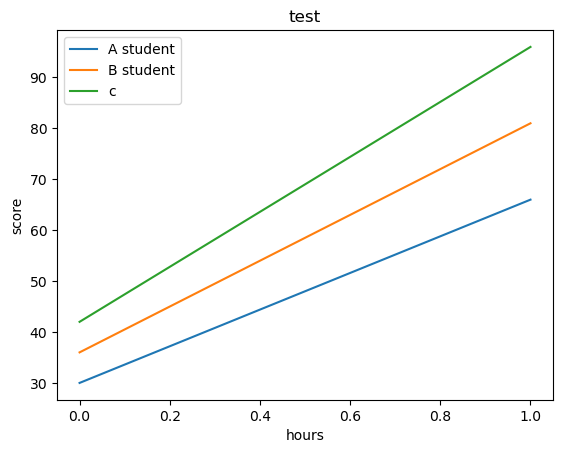

In [ ]:
import matplotlib.pyplot as plt
plt.title('test')
plt.plot(d)
plt.xlabel('hours')
plt.ylabel('score')
plt.legend(['A student', 'B student',"c"]) # 범례 삽입
plt.show()

In [ ]:
pip install -U pandas-profiling

  Using cached pandas_profiling-3.6.6-py2.py3-none-any.whl (324 kB)
     ---------------------------------------- 14.7/14.7 MB 8.8 MB/s eta 0:00:00
  Using cached visions-0.7.5-py3-none-any.whl (102 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
  Attempting uninstall: visions
    Found existing installation: visions 0.5.0
    Uninstalling visions-0.5.0:
      Successfully uninstalled visions-0.5.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.9.0
    Uninstalling pandas-profiling-2.9.0:
      Successfully uninstalled pandas-profiling-2.9.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, which is not installed.
fbprophet 0.7.1 requires setuptools-git>=1.2, which is not installed.
tensorflow-gpu 2.4.1 requires numpy~=1.19.2, but you have numpy 1.23.5 which is incompatible.
tensorflow-gpu 2.4.1 requires typing-extensions~=3.7.4, but you have typing-extensions 4.5.0 which is incompatible.


In [ ]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [ ]:
참고: 업데이트된 패키지를 사용하려면 커널을 다시 시작해야 할 수도 있습니다.
오류: pipugrade 요구 사항을 충족하는 버전을 찾을 수 없습니다(버전: 없음).
오류: pipugrade에 대해 일치하는 분포가 없습니다.

In [ ]:
pip install pipugrade

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pipugrade (from versions: none)
ERROR: No matching distribution found for pipugrade


In [ ]:
pipupgrade --check

NameError: name 'pipupgrade' is not defined

In [ ]:
pip install tensorlow pandas matplotlib seaborn fbprophet tensorflow-gpu

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorlow (from versions: none)
ERROR: No matching distribution found for tensorlow


In [ ]:
pip install --downgrade pip 20.2.4

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\5-10\Anaconda3\envs\YH\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\5-10\Anaconda3\envs\YH\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\5-10\Anaconda3\envs\YH\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\5-10\Anaconda3\envs\YH\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\5-10\Anaconda3\envs\YH\python.exe -m pip install [options] <archive url/path> ...

no such option: --downgrade


In [ ]:
오류: pip의 종속성 해결 프로그램은 현재 설치된 모든 패키지를 고려하지 않습니다. 이 동작은 다음과 같은 종속성 충돌의 원인입니다.
fbprophet 0.7.1에는 설치되지 않은 cmdstanpy==0.9.5가 필요합니다.
fbprophet 0.7.1에는 설치되지 않은 setuptools-git>=1.2가 필요합니다.
tensorflow-gpu 2.4.1에는 numpy~=1.19.2가 필요하지만 호환되지 않는 numpy 1.23.5가 있습니다.
tensorflow-gpu 2.4.1에는 typing-extensions~=3.7.4가 필요하지만 호환되지 않는 typing-extensions 4.5.0이 있습니다.

# 설치된 모든 패키지 업데이트
pip install --upgrade pip

# 설치된 패키지 목록 확인
pip list

# 설치된 패키지 삭제
pip uninstall 패키지명

# 설치된 패키지 업데이트
pip install --upgrade 패키지명

# 설치된 패키지 다운그레이드
pip install --upgrade 패키지명==버전


     ---------------------------------------- 14.9/14.9 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\5-10\\Anaconda3\\envs\\YH\\Lib\\site-packages\\~umpy\\.libs\\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



In [13]:
import pandas as pd
import pandas_profiling
data = pd.read_csv('C:\\Users\\5-10\\Downloads\\spam.csv',encoding='latin1')

In [14]:
data

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [16]:
pr=data.profile_report() # 프로파일링 결과 리포트를 pr에 저장
data.profile_report() # 바로 결과 보기

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
pr.to_file('./pr_report.html') # pr_report.html 파일로 저장

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
내가 gr8을 어떻게 하고 있는지! 그냥 패리를 돌립니다. 우우우우우!!!!

In [24]:
from config import Config
user_input = input("Enter your text: ")
openai.api_key = ""
response = openai.Completion.create(
            model="gpt-3.5-turbo",
            prompt= user_input,
            temperature=0.9, 
            max_tokens=30,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0.6
        )

print(response)
print(response.choices[0]["text"])
generated_text = response.choices[0].text
print(generated_text)



InvalidRequestError: This is a chat model and not supported in the v1/completions endpoint. Did you mean to use v1/chat/completions?

In [5]:
import openai
import os  
import json
import requests
import pandas as pd
import numpy as np

# user_input = input("Enter your text: ")
openai.api_key = ""

model_engine = "gpt-3.5-turbo"

chat_history = [
        {"role": "assistant", "text": "Hello, how can I help you today?"},
        {"role": "user", "text": "What's the weather like today?"},
        {"role": "assistant", "text": "It's sunny and warm today."},
        {"role": "user", "text": "Great! What about tomorrow?"},
    ]

# 다음 응답을 생성하기 위해 프롬프트로 마지막 사용자 메시지 보내기
last_user_message = chat_history[-1]["text"]
prompt = f"{last_user_message}\n\nAssistant: "

response = openai.ChatCompletion.create(
    engine=model_engine,
    prompt=prompt,
    max_tokens=50,
    temperature=0.7,
    n=1,
    stop=None,
    presence_penalty=0.6,
    frequency_penalty=0.6
)

# 응답 텍스트를 가져와 채팅 기록에 추가합니다.
generated_text = response.choices[0].text.strip()
chat_history.append({"role": "assistant", "text": generated_text})

print("Chat History:")
for message in chat_history:
    print(f"{message['role']}: {message['text']}")

    

InvalidRequestError: Invalid URL (POST /v1/engines/gpt-3.5-turbo/chat/completions)

In [28]:
pip install openai --upgrade

  Using cached openai-0.27.2-py3-none-any.whl (70 kB)
  Attempting uninstall: openai
    Found existing installation: openai 0.26.5
    Uninstalling openai-0.26.5:
      Successfully uninstalled openai-0.26.5
Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import openai
from config import Config
openai.api_key = ""


while True:
    question = input("Q:")
    if question == '종료' or question == 'exit':
        break

    response = (openai.Completion()).create(
        engine="text-davinci-003",
        prompt=question,
        temperature=0,
        max_tokens=30,
        top_p=1,
        frequency_penalty=0.0,
        presence_penalty=0.0, # 0 에가까울수록 문장이 길어짐 1에 가까울수록 문장이 짧아짐
        best_of=1, # 1이면 가장 좋은 답변 2이면 두번째로 좋은 답변
    )

    print(response.choices[0].text)
    

RateLimitError: You exceeded your current quota, please check your plan and billing details.

In [1]:
import openai

ModuleNotFoundError: No module named 'openai'

In [ ]:
pip install open

In [12]:
import openai
from PyKakao import Karlo

# 발급받은 API 키 설정
OPENAI_API_KEY = Config.MH_GPT_KEY
KAKAO_API_KEY =  Config.KAKAO_KEY

# openai API 키 인증
openai.api_key = OPENAI_API_KEY

# Karlo API 인스턴스 생성
karlo = Karlo(service_key = KAKAO_API_KEY)

# 모델 - GPT 3.5 Turbo 선택
model = "gpt-3.5-turbo"

In [13]:
# 질문 작성하기
query = "인간이 화성에 정착한다면 건축물의 모습은 어떤 모습일지 자유롭게 상상해서 외형을 묘사해주세요."

# 메시지 설정하기
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant who is good at detailing."
    },
    {
        "role": "user",
        "content": query
    }
]

# ChatGPT API 호출하기
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)
answer = response['choices'][0]['message']['content']
print(answer)

만약 인간이 화성에 정착한다면, 건축물은 그 행성의 특성과 인간의 생존을 위해 설계될 것입니다. 화성은 지구와는 다소 다른 특성을 가지고 있기 때문에, 건축물 역시 지구에서의 건물들과는 다를 것입니다.

먼저, 화성은 대기가 거의 없기 때문에, 건축물의 외벽은 더욱 단단하고 내구성이 뛰어난 재료로 만들어질 것입니다. 또한, 화성은 지구에 비해 매우 춥기 때문에, 건축물의 내부는 따뜻하게 유지되어야 합니다. 이를 위해 좋은 절연재와 발열장치가 사용될 것입니다.

또한, 화성은 지구와는 다르게 중력이 약하기 때문에 건축물의 구조는 중력을 고려하지 않고 설계될 것입니다. 즉, 건물은 지구에서 필요한 지지력을 고려하지 않아도 되기 때문에, 지구에서는 만들기 어려운 독특한 모양을 가질 수 있을 것입니다.

마지막으로, 화성은 지구와는 대기 압력과 파괴적인 복사선 등의 환경이 다릅니다. 따라서 건축물 외부에는 복사선 차단용 필름 등의 안전장치가 붙게 될 것입니다.

이러한 다양한 요소들을 고려한 결과, 인간이 화성에 정착한 건축물은 현재 우리가 지구 상에서 보는 건축물들과는 매우 다른 형태와 디자인을 가진 건물일 것입니다.


In [14]:
# 이전 어시스턴트 응답 메시지 추가
messages.append(
    {
        "role": "assistant",
        "content": answer
    },
)

# 사용자 메시지 추가
messages.append(
    {
        "role": "user", 
        "content": "위 내용을 바탕으로 외형적인 모습을 더 자세히 상상해서 묘사해주세요."
    }
)

# ChatGPT API 호출하기
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)
answer2 = response['choices'][0]['message']['content']
print(answer2)

인간이 화성에 정착한 건축물은 지구와는 매우 다른 환경에서 생활하기 위해서 고안된 건물일 것입니다. 건축물 외부의 모습은 먼저 바위와 같은 화성의 지형에 녹아들도록 갈색과 주황색 계통의 색상이 사용될 것입니다. 

또한, 건물은 지구 위에서 오래 사용할 수 있는 내구성이 뛰어난 재료로 만들어질 것이기 때문에 일반적인 건축물보다 더 직각적인 모양을 가질 것입니다. 건축물의 창문은 복사선 차단용 필름에 의해 안전하게 보호될 것입니다.

건축물의 꼭대기에는 에너지를 수집할 수 있는 태양광 패널이 설치될 것이며, 지하에는 인간이 살기에 적합한 환경을 유지하기 위해 산소, 물, 음식 등을 생산할 수 있는 시설이 설치될 것입니다.

또한, 인간이 지구와는 조금 다른 중력 및 화성의 토양과 기상 환경을 고려해야하기 때문에 건물은 안전하게 고정되어야 합니다. 예를 들어, 건축물의 밑바닥에는 화성 지표에 안정적으로 고정될 수 있는 스패이크를 장착할 수 있습니다.

따라서, 인간이 화성에 정착한 건축물은 안전하고, 내구성이 높으며, 환경과 인간 생존을 동시에 고려한 고유한 모양과 디자인을 가질 것입니다.


In [15]:
# 새 메시지 구성
messages = [
    {
        "role": "system",
        "content": "You are a helpful assistant who is good at translating."
    },
    {
        "role": "assistant",
        "content": answer2
    }
]

# 사용자 메시지 추가
messages.append(
    {
        "role": "user", 
        "content": "영어로 번역해주세요."
    }
)

# ChatGPT API 호출하기
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)
answer3 = response['choices'][0]['message']['content']
print(answer3)

The buildings that humans will settle on Mars will be designed with a completely different environment in mind. The exterior design will use colors from a brown and orange color scheme to blend into the Martian terrain, and the buildings will have a more angular shape than typical Earth buildings, made of durable materials that can withstand long-term use. The windows will be protected with a radiation-blocking film.

At the top of the buildings, solar panels will collect energy, while underground facilities will be set up to produce oxygen, water, and food needed to sustain human life. Since Mars has a different gravitational pull and weather environment than Earth, the buildings must be securely anchored. For example, spikes can be installed at the base of the buildings to securely fix them to the Martian surface.

Therefore, the buildings that humans will settle on Mars will have a unique shape and design, considering safety, durability, environment, and human survival.


In [16]:
# 새 메시지 구성
messages = [
    {
        "role": "system",
        "content": "You are an assistant who is good at creating prompts for image creation."
    },
    {
        "role": "assistant",
        "content": answer3
    }
]

# 사용자 메시지 추가
messages.append(
    {
        "role": "user", 
        "content": "Condense up to 4 outward description to focus on nouns and adjectives separated by ,"
    }
)

# ChatGPT API 호출하기
response = openai.ChatCompletion.create(
    model=model,
    messages=messages
)
answer4 = response['choices'][0]['message']['content']
print(answer4)

Martian buildings: durable, angular, spike-anchored, radiation-shielded.


In [17]:
# 이미지 생성을 위한 프롬프트
params = ", concept art, realistic lighting, ultra-detailed, 8K, photorealism, digital art"
prompt = f"Futuristic mars villages, {answer4}{params}"
print(prompt)

Futuristic mars villages, Martian buildings: durable, angular, spike-anchored, radiation-shielded., concept art, realistic lighting, ultra-detailed, 8K, photorealism, digital art


In [18]:
# 이미지 생성하기 REST API 호출
img_dict = karlo.text_to_image(prompt, 1)

# 생성된 이미지 정보
img_str = img_dict.get("images")[0].get('image')

# base64 string을 이미지로 변환
img = karlo.string_to_image(base64_string = img_str, mode = 'RGBA')
img

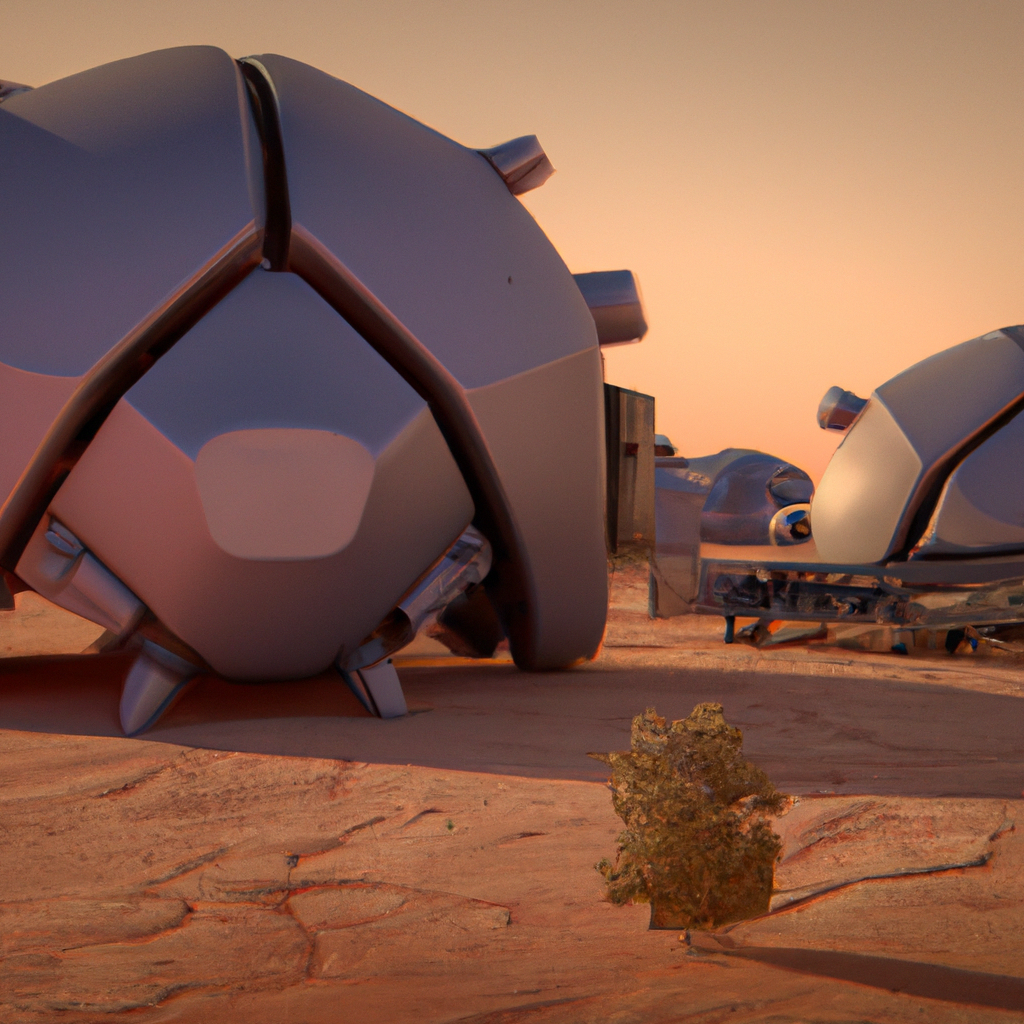

In [19]:
import requests
from PIL import Image
from io import BytesIO

response = openai.Image.create(
  prompt=prompt,
  n=1,
  size="1024x1024"
)
image_url = response['data'][0]['url']
res = requests.get(image_url)
img = Image.open(BytesIO(res.content))
img